In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
X=pd.read_csv('ECG_dataX.csv')
Y=pd.read_csv('ECG_dataY.csv')

In [3]:
X=X.values
X.shape 

(3841, 187)

In [4]:
Y=Y.values
Y.shape

(3841, 1)

In [5]:
Y=Y.reshape(-1)
Y.shape

(3841,)

(array([800.,   0., 800.,   0.,   0., 800.,   0., 641.,   0., 800.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

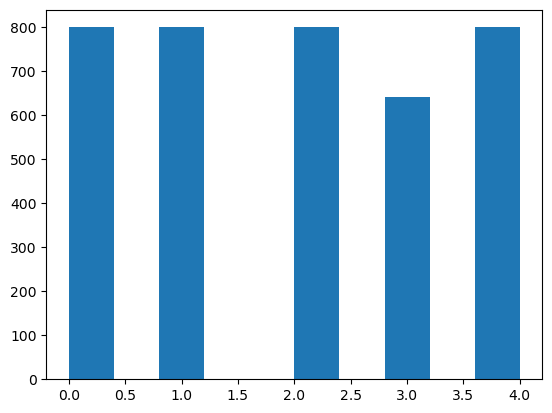

In [6]:
plt.hist(Y)

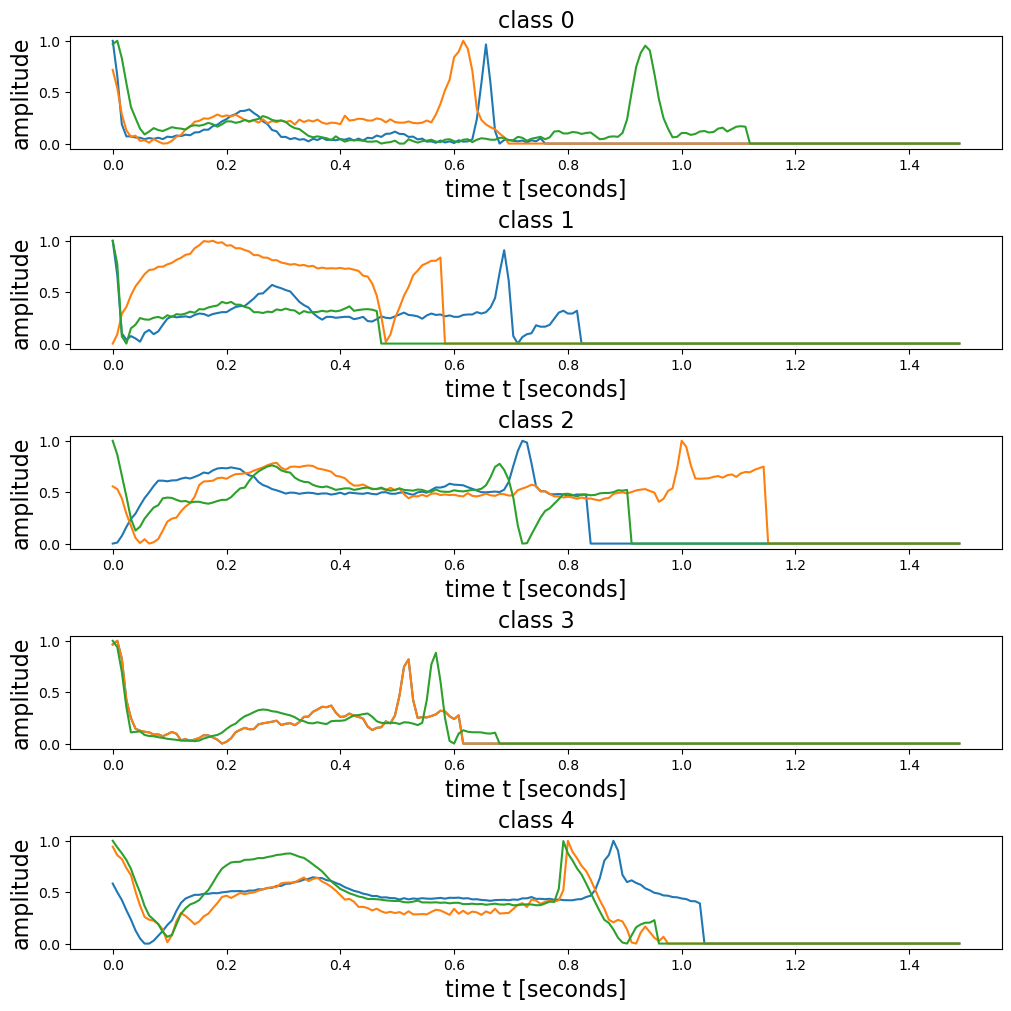

In [7]:
fs=125  # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints
fig, ax = plt.subplots(5,1,constrained_layout=True, figsize=(10,10))
for c in range(0, 5):   
    for n in range(0, 3):
        idx=np.random.randint(0,10)
        ax[c].plot(t, X[Y==c][idx])        
        ax[c].set_xlabel('time t [seconds]', fontsize=16)
        ax[c].set_ylabel('amplitude', fontsize=16)
    ax[c].set_title('class '+str(c), fontsize=16)

Data Splitting for Training and Testing Sets


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

KNeighborsClassifier

In [9]:
KNN = KNeighborsClassifier()

In [10]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [11]:
KNN_train_accuracy = KNN.score(X_train, Y_train)

In [12]:
KNN_test_accuracy = KNN.score(X_test, Y_test)

LogisticRegression Classifier

In [13]:
LR = LogisticRegression(solver='newton-cg')

In [14]:
LR.fit(X_train, Y_train)

LogisticRegression(solver='newton-cg')

In [15]:
LR_train_accuracy = LR.score(X_train, Y_train)

In [16]:
LR_test_accuracy = LR.score(X_test, Y_test)

DecisionTreeClassifier

In [17]:
DT = DecisionTreeClassifier(random_state=0)

In [18]:
DT.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
DT_train_accuracy = DT.score(X_train, Y_train)

In [20]:
DT_test_accuracy = DT.score(X_test, Y_test)

RandomForestClassifier

In [21]:
RF = RandomForestClassifier(random_state=0)

In [22]:
RF.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [23]:
RF_train_accuracy = RF.score(X_train, Y_train)

In [24]:
RF_test_accuracy = RF.score(X_test, Y_test)

Pandas dataframe report for training accuracy and test accuracy

In [27]:
report = {
    '': ['training accuracy', 'test accuracy'],
    'KNeighborsClassifier': [KNN_train_accuracy, KNN_test_accuracy],
    'LogisticRegression': [LR_train_accuracy, LR_test_accuracy],
    'DecisionTreeClassifier': [DT_train_accuracy, DT_test_accuracy],
    'RandomForestClassifier': [RF_train_accuracy, RF_test_accuracy]
}

accuracy_df = pd.DataFrame(report)
accuracy_df

,,KNeighborsClassifier,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier
0,training accuracy,0.880534,0.771484,1.000000,1.000000
1,test accuracy,0.881664,0.765930,0.843953,0.908973
